In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [40]:
df=pd.read_csv(r"data\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [41]:
cat_cols = df.select_dtypes(include="object").columns

value_counts = [df[col].value_counts() for col in cat_cols.values]
value_counts

[gender
 female    518
 male      482
 Name: count, dtype: int64,
 race/ethnicity
 group C    319
 group D    262
 group B    190
 group E    140
 group A     89
 Name: count, dtype: int64,
 parental level of education
 some college          226
 associate's degree    222
 high school           196
 some high school      179
 bachelor's degree     118
 master's degree        59
 Name: count, dtype: int64,
 lunch
 standard        645
 free/reduced    355
 Name: count, dtype: int64,
 test preparation course
 none         642
 completed    358
 Name: count, dtype: int64]

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [45]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [46]:
num_cols = df.select_dtypes(exclude="object").columns
num_cols

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [47]:
average_score_gender = df.groupby("gender")[["math score","reading score", "writing score"]].mean().round(2)
average_score_gender

,math score,reading score,writing score
gender,,,
female,63.63,72.61,72.47
male,68.73,65.47,63.31


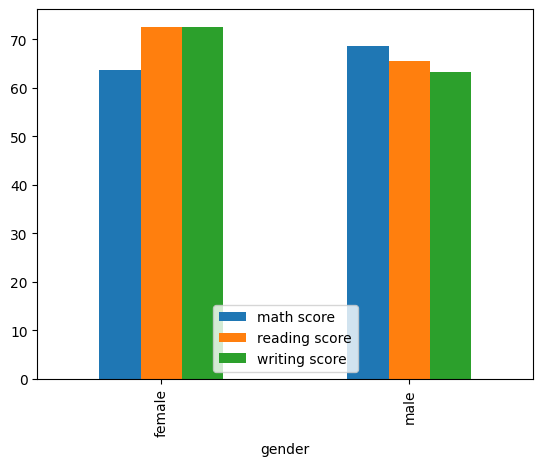

In [48]:
average_score_gender.plot(kind="bar");

gender
female    Axes(0.125,0.11;0.775x0.77)
male      Axes(0.125,0.11;0.775x0.77)
dtype: object

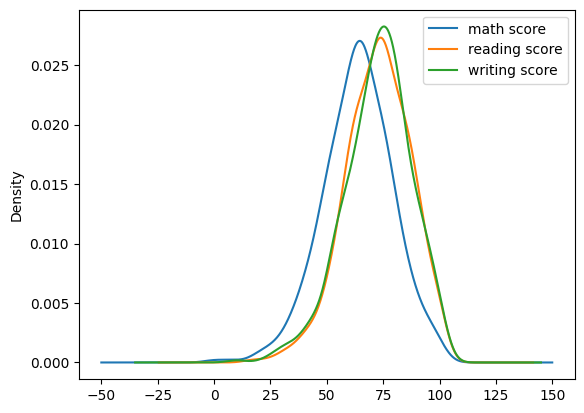

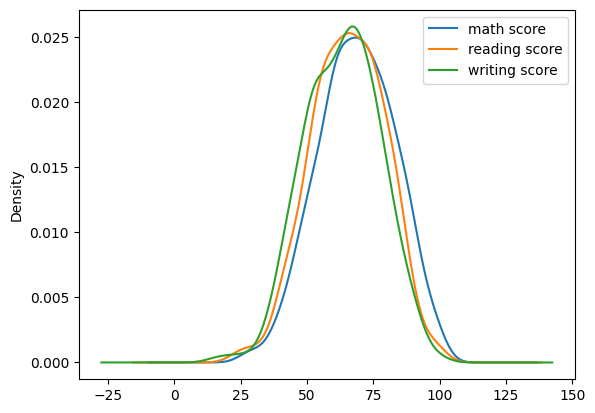

In [49]:
df.groupby("gender")[["math score","reading score", "writing score"]].plot(kind="kde")

In [50]:
corr = df[num_cols].corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

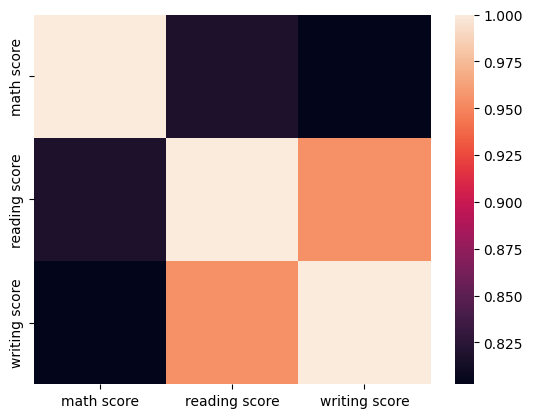

In [51]:
sns.heatmap(corr)